## Problem Statement
#### The company is keen to understand the key factors through visualisation that cause the delay and predict the possibility of delay in the future.
There are two datasets  :
1.	Train Dataset -   January 2016 through January 2017 
2.	Test Dataset - January 2018 


In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [2]:
#Reading the train and the test data
import os
import pandas as pd
os.chdir("C:/Users/DELL/Desktop/Soulpage/data_science_compt-20190413T035412Z-001/data_science_compt/Train Dataset/DallasFort Worth-Newyork")

#data = pd.read_csv("")
Train_Dallas_2016 = pd.read_csv("Dallas_2016.csv",skiprows = 7,usecols = range(17))
Train_Dallas_2017 = pd.read_csv("Dallas_2017.csv",skiprows = 7,usecols = range(17))
Train_Newyork_2016 = pd.read_csv("New-york-2016.csv",skiprows = 7,usecols = range(17))
Train_Newyork_2017 = pd.read_csv("New-york-2017.csv",skiprows = 7,usecols = range(17))


In [3]:
Train_data_Dallas = Train_Dallas_2016.append(Train_Dallas_2017)
Train_data_Dallas.shape

(11171, 17)

In [4]:
Train_data_Newyork = Train_Newyork_2016.append(Train_Newyork_2017)
Train_data_Newyork.shape

(48815, 17)

#### FINAL MERGED TRAIN DATA

In [5]:
Train_data = Train_data_Newyork.append(Train_data_Dallas)
Train_data.shape

(59986, 17)

In [6]:
Train_data.head(2).T

,0,1
Carrier Code,DL,DL
Date (MM/DD/YYYY),01/01/2016,01/01/2016
Flight Number,189,344
Tail Number,N957AT,N979AT
Destination Airport,DTW,ATL
Scheduled departure time,09:05,12:00
Actual departure time,09:19,11:55
Scheduled elapsed time (Minutes),129,172
Actual elapsed time (Minutes),120,141
Departure delay (Minutes),14,-5


In [7]:
Train_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)'],
      dtype='object')

### Replacing the space in the column header with '_'

In [8]:
Train_data.columns =Train_data.columns.str.replace(' ' , '_') 
Train_data.columns

Index(['Carrier_Code', 'Date_(MM/DD/YYYY)', 'Flight_Number', 'Tail_Number',
       'Destination_Airport', 'Scheduled_departure_time',
       'Actual_departure_time', 'Scheduled_elapsed_time_(Minutes)',
       'Actual_elapsed_time_(Minutes)', 'Departure_delay_(Minutes)',
       'Wheels-off_time', 'Taxi-Out_time_(Minutes)', 'Delay_Carrier_(Minutes)',
       'Delay_Weather_(Minutes)', 'Delay_National_Aviation_System_(Minutes)',
       'Delay_Security_(Minutes)', 'Delay_Late_Aircraft_Arrival_(Minutes)'],
      dtype='object')

### Checking the Null Values

In [9]:
Train_data.isnull().sum(axis=0)

Carrier_Code                                 1
Date_(MM/DD/YYYY)                            5
Flight_Number                                5
Tail_Number                                 15
Destination_Airport                          5
Scheduled_departure_time                     5
Actual_departure_time                        5
Scheduled_elapsed_time_(Minutes)             5
Actual_elapsed_time_(Minutes)                5
Departure_delay_(Minutes)                    5
Wheels-off_time                              5
Taxi-Out_time_(Minutes)                      5
Delay_Carrier_(Minutes)                      5
Delay_Weather_(Minutes)                      5
Delay_National_Aviation_System_(Minutes)     5
Delay_Security_(Minutes)                     5
Delay_Late_Aircraft_Arrival_(Minutes)        5
dtype: int64

In [10]:
Train_data = Train_data.fillna(method = 'ffill')
Train_data.isnull().sum(axis=0)

Carrier_Code                                0
Date_(MM/DD/YYYY)                           0
Flight_Number                               0
Tail_Number                                 0
Destination_Airport                         0
Scheduled_departure_time                    0
Actual_departure_time                       0
Scheduled_elapsed_time_(Minutes)            0
Actual_elapsed_time_(Minutes)               0
Departure_delay_(Minutes)                   0
Wheels-off_time                             0
Taxi-Out_time_(Minutes)                     0
Delay_Carrier_(Minutes)                     0
Delay_Weather_(Minutes)                     0
Delay_National_Aviation_System_(Minutes)    0
Delay_Security_(Minutes)                    0
Delay_Late_Aircraft_Arrival_(Minutes)       0
dtype: int64

### Reading the test data

In [11]:
#data = pd.read_csv("")
Test_Dallas_2018 = pd.read_csv("C:/Users/DELL/Desktop/Soulpage/data_science_compt-20190413T035412Z-001/data_science_compt/Test Dataset/New York_DallasFort Worth/Dallas_2018.csv",skiprows = 7,usecols = range(17))
Test_Newyork_2018 = pd.read_csv("C:/Users/DELL/Desktop/Soulpage/data_science_compt-20190413T035412Z-001/data_science_compt/Test Dataset/New York_DallasFort Worth/Newyork-2018.csv",skiprows = 7,usecols = range(17))
Test_data = Test_Dallas_2018.append(Test_Newyork_2018)
Test_data.shape

(30784, 17)

In [12]:
Test_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)'],
      dtype='object')

In [13]:
Test_data.columns =Test_data.columns.str.replace(' ' , '_') 
Test_data.columns

Index(['Carrier_Code', 'Date_(MM/DD/YYYY)', 'Flight_Number', 'Tail_Number',
       'Destination_Airport', 'Scheduled_departure_time',
       'Actual_departure_time', 'Scheduled_elapsed_time_(Minutes)',
       'Actual_elapsed_time_(Minutes)', 'Departure_delay_(Minutes)',
       'Wheels-off_time', 'Taxi-Out_time_(Minutes)', 'Delay_Carrier_(Minutes)',
       'Delay_Weather_(Minutes)', 'Delay_National_Aviation_System_(Minutes)',
       'Delay_Security_(Minutes)', 'Delay_Late_Aircraft_Arrival_(Minutes)'],
      dtype='object')

In [14]:
Test_data.isnull().sum(axis=0)
Test_data = Test_data.fillna(method = 'ffill')
Test_data.isnull().sum(axis=0)

Carrier_Code                                0
Date_(MM/DD/YYYY)                           0
Flight_Number                               0
Tail_Number                                 0
Destination_Airport                         0
Scheduled_departure_time                    0
Actual_departure_time                       0
Scheduled_elapsed_time_(Minutes)            0
Actual_elapsed_time_(Minutes)               0
Departure_delay_(Minutes)                   0
Wheels-off_time                             0
Taxi-Out_time_(Minutes)                     0
Delay_Carrier_(Minutes)                     0
Delay_Weather_(Minutes)                     0
Delay_National_Aviation_System_(Minutes)    0
Delay_Security_(Minutes)                    0
Delay_Late_Aircraft_Arrival_(Minutes)       0
dtype: int64

In [15]:
Train_data.dtypes

Carrier_Code                                 object
Date_(MM/DD/YYYY)                            object
Flight_Number                               float64
Tail_Number                                  object
Destination_Airport                          object
Scheduled_departure_time                     object
Actual_departure_time                        object
Scheduled_elapsed_time_(Minutes)            float64
Actual_elapsed_time_(Minutes)               float64
Departure_delay_(Minutes)                   float64
Wheels-off_time                              object
Taxi-Out_time_(Minutes)                     float64
Delay_Carrier_(Minutes)                     float64
Delay_Weather_(Minutes)                     float64
Delay_National_Aviation_System_(Minutes)    float64
Delay_Security_(Minutes)                    float64
Delay_Late_Aircraft_Arrival_(Minutes)       float64
dtype: object

### DATA PREPROCESSING and FEATURE ENGINEERING

##### DATA PREPROCESSING:
  -Converting Date to Datetime format <br>
  -Dropping Carrier_Code and Tail_Number <br>
  -Converting Destination_Airport to Categorical Type <br>
  -Calculating Elapse_delay = Actual_elapsed_time_(Minutes) - Scheduled_elapsed_time_(Minutes) <br>
  -Calculating the target Variable <br>
  

In [16]:
Train_data["Date_(MM/DD/YYYY)"]=pd.to_datetime(Train_data["Date_(MM/DD/YYYY)"])
Train_data1 = Train_data.drop(["Carrier_Code"],axis=1)
Train_data1 = Train_data1.drop(["Tail_Number"],axis=1)
Train_data1["Destination_Airport"] = Train_data1["Destination_Airport"].astype('category')


Test_data["Date_(MM/DD/YYYY)"]=pd.to_datetime(Test_data["Date_(MM/DD/YYYY)"])
Test_data1 = Test_data.drop(["Carrier_Code"],axis=1)
Test_data1 = Test_data1.drop(["Tail_Number"],axis=1)
Test_data1["Destination_Airport"] = Test_data1["Destination_Airport"].astype('category')

In [17]:
Train_data1.dtypes

Date_(MM/DD/YYYY)                           datetime64[ns]
Flight_Number                                      float64
Destination_Airport                               category
Scheduled_departure_time                            object
Actual_departure_time                               object
Scheduled_elapsed_time_(Minutes)                   float64
Actual_elapsed_time_(Minutes)                      float64
Departure_delay_(Minutes)                          float64
Wheels-off_time                                     object
Taxi-Out_time_(Minutes)                            float64
Delay_Carrier_(Minutes)                            float64
Delay_Weather_(Minutes)                            float64
Delay_National_Aviation_System_(Minutes)           float64
Delay_Security_(Minutes)                           float64
Delay_Late_Aircraft_Arrival_(Minutes)              float64
dtype: object

In [18]:
Test_data1.dtypes

Date_(MM/DD/YYYY)                           datetime64[ns]
Flight_Number                                      float64
Destination_Airport                               category
Scheduled_departure_time                            object
Actual_departure_time                               object
Scheduled_elapsed_time_(Minutes)                   float64
Actual_elapsed_time_(Minutes)                      float64
Departure_delay_(Minutes)                          float64
Wheels-off_time                                     object
Taxi-Out_time_(Minutes)                            float64
Delay_Carrier_(Minutes)                            float64
Delay_Weather_(Minutes)                            float64
Delay_National_Aviation_System_(Minutes)           float64
Delay_Security_(Minutes)                           float64
Delay_Late_Aircraft_Arrival_(Minutes)              float64
dtype: object

In [19]:
Train_data1['Scheduled_departure_time'] = Train_data1['Scheduled_departure_time'].astype('str')
Test_data1['Scheduled_departure_time'] = Test_data1['Scheduled_departure_time'].astype('str')

#### Calculating the Elapsed Delay i.e Actual Elapsed time - Scheduled Elapsed Time

In [20]:
Train_data1['Elapse_delay']= Train_data1['Actual_elapsed_time_(Minutes)'] - Train_data1['Scheduled_elapsed_time_(Minutes)']
Train_data1['Elapse_delay'].head()
Test_data1['Elapse_delay']= Test_data1['Actual_elapsed_time_(Minutes)'] - Test_data1['Scheduled_elapsed_time_(Minutes)']
Test_data1['Elapse_delay'].head()

0    -6
1   -24
2   -20
3   -20
4   -29
Name: Elapse_delay, dtype: float64

In [21]:
Train_data1.loc[: , ['Actual_departure_time','Scheduled_departure_time','Departure_delay_(Minutes)','Elapse_delay']].head(5)

,Actual_departure_time,Scheduled_departure_time,Departure_delay_(Minutes),Elapse_delay
0,09:19,09:05,14,-9
1,11:55,12:00,-5,-31
2,12:29,12:30,-1,-23
3,17:05,17:00,5,-22
4,16:14,16:15,-1,-36


In [22]:
#Train_data1['Delay'] = Train_data1['Elapse_delay'] +Train_data1['Departure_delay_(Minutes)'] + Train_data1['Delay_Carrier_(Minutes)']+Train_data1['Delay_Weather_(Minutes)']+Train_data1['Delay_National_Aviation_System_(Minutes)']+Train_data1['Delay_Security_(Minutes)']+Train_data1['Delay_Late_Aircraft_Arrival_(Minutes)']
Train_data1['Delay'] = Train_data1['Elapse_delay'] +Train_data1['Departure_delay_(Minutes)'] 
#Test_data1['Delay'] = Test_data1['Elapse_delay'] +Test_data1['Departure_delay_(Minutes)'] + Test_data1['Delay_Carrier_(Minutes)']+Test_data1['Delay_Weather_(Minutes)']+Test_data1['Delay_National_Aviation_System_(Minutes)']+Test_data1['Delay_Security_(Minutes)']+Test_data1['Delay_Late_Aircraft_Arrival_(Minutes)']
Test_data1['Delay'] = Test_data1['Elapse_delay'] +Test_data1['Departure_delay_(Minutes)']
Train_data1['Delay'].head(4)

0     5
1   -36
2   -24
3   -17
Name: Delay, dtype: float64

### Here we are more focussed on the flight delay. So if the total delay is less than 10 mins we can keep that as '0'. So that we can train our model well with delay time

In [23]:
Train_data1["Delay"] = Train_data1.apply(lambda x:0 if x.Delay < 10 else x.Delay, axis=1)
Train_data1["Delay"] = Train_data1["Delay"].astype('int64')

Test_data1["Delay"] = Test_data1.apply(lambda x:0 if x.Delay < 10 else x.Delay, axis=1)
Test_data1["Delay"] = Test_data1["Delay"].astype('int64')

In [24]:
Train_data1.loc[Train_data1['Delay'] > 130].head(5)

,Date_(MM/DD/YYYY),Flight_Number,Destination_Airport,Scheduled_departure_time,Actual_departure_time,Scheduled_elapsed_time_(Minutes),Actual_elapsed_time_(Minutes),Departure_delay_(Minutes),Wheels-off_time,Taxi-Out_time_(Minutes),Delay_Carrier_(Minutes),Delay_Weather_(Minutes),Delay_National_Aviation_System_(Minutes),Delay_Security_(Minutes),Delay_Late_Aircraft_Arrival_(Minutes),Elapse_delay,Delay
129,2016-01-02,2121,RSW,19:45,22:57,213,187,192,23:19,22,0,0,0,0,166,-26,166
169,2016-01-03,810,DEN,08:30,15:44,290,254,434,16:00,16,398,0,0,0,0,-36,398
332,2016-01-04,2686,BOS,16:59,00:16,84,58,437,00:32,16,411,0,0,0,0,-26,411
344,2016-01-05,970,FLL,13:10,18:05,206,185,295,18:35,30,274,0,0,0,0,-21,274
378,2016-01-05,2019,RDU,14:29,19:36,118,111,307,20:07,31,290,0,0,0,10,-7,300


### Creating quarter from the date field

In [25]:
Train_data1['Quarter'] = Train_data1['Date_(MM/DD/YYYY)'].dt.quarter
Test_data1['Quarter'] = Test_data1['Date_(MM/DD/YYYY)'].dt.quarter
Train_data1.loc[: , ['Quarter','Date_(MM/DD/YYYY)']].head(5)

,Quarter,Date_(MM/DD/YYYY)
0,1,2016-01-01
1,1,2016-01-01
2,1,2016-01-01
3,1,2016-01-01
4,1,2016-01-01


In [26]:
Train_data1['Quarter'] = Train_data1['Quarter'].astype('category')
Test_data1['Quarter'] = Test_data1['Quarter'].astype('category')

### Creating DayofWeek from Date Field

In [27]:
Train_data1['Dayofweek'] = Train_data1['Date_(MM/DD/YYYY)'].dt.dayofweek
Test_data1['Dayofweek'] = Test_data1['Date_(MM/DD/YYYY)'].dt.dayofweek
Train_data1['Dayofweek'].head(4)

0    4
1    4
2    4
3    4
Name: Dayofweek, dtype: int64

### Creating a field time to know if it is a "Evening" , "Morning" ,"Night" flight based on the Scheduled Departure Time

In [92]:
#Train_data1['Scheduled_departure_time'] =Train_data1['Scheduled_departure_time'].str.replace(':' , '') 
#Train_data1['Actual_departure_time'] =Train_data1['Actual_departure_time'].str.replace(':' , '')
Train_data1['Scheduled_departure_time'] =Train_data1['Scheduled_departure_time'].astype('int')
Train_data1["Time"] = Train_data1.apply( lambda x: 'Morning' if x.Scheduled_departure_time > 2000 &  x.Scheduled_departure_time <= 600 else 'Night' , axis=1)
#Train_data1["Time"] = Train_data1.apply( lambda x: 'evening' if x.Scheduled_departure_time >= 1600 &  x.Scheduled_departure_time <= 2000 else x.Time , axis=1)



#Test_data1['Scheduled_departure_time'] =Test_data1['Scheduled_departure_time'].str.replace(':' , '') 
#Train_data1['Actual_departure_time'] =Train_data1['Actual_departure_time'].str.replace(':' , '')
Test_data1['Scheduled_departure_time'] =Test_data1['Scheduled_departure_time'].astype('int')
Test_data1["Time"] = Test_data1.apply( lambda x: 'Night' if x.Scheduled_departure_time > 2000 &  x.Scheduled_departure_time <= 600 else 'Morning' , axis=1)
#Test_data1["Time"] = Test_data1.apply( lambda x: 'evening' if x.Scheduled_departure_time >= 1600 &  x.Scheduled_departure_time <= 2000 else x.Time , axis=1)



In [93]:
Train_data1["Time"].unique()

array(['Night', 'Morning'], dtype=object)

In [30]:
Train_data1["Time"] = Train_data1["Time"].astype('category')
Test_data1["Time"] = Test_data1["Time"].astype('category')
Train_data1["Time"].head(5)

0    Morning
1    Morning
2    Morning
3    Morning
4    Morning
Name: Time, dtype: category
Categories (2, object): [Morning, Night]

In [31]:
Train_data1.columns

Index(['Date_(MM/DD/YYYY)', 'Flight_Number', 'Destination_Airport',
       'Scheduled_departure_time', 'Actual_departure_time',
       'Scheduled_elapsed_time_(Minutes)', 'Actual_elapsed_time_(Minutes)',
       'Departure_delay_(Minutes)', 'Wheels-off_time',
       'Taxi-Out_time_(Minutes)', 'Delay_Carrier_(Minutes)',
       'Delay_Weather_(Minutes)', 'Delay_National_Aviation_System_(Minutes)',
       'Delay_Security_(Minutes)', 'Delay_Late_Aircraft_Arrival_(Minutes)',
       'Elapse_delay', 'Delay', 'Quarter', 'Dayofweek', 'Time'],
      dtype='object')

### Visualization of the Data


### Frequency of flights with respect to Origin.

In [114]:
!pip install pandas_profiling

In [116]:
import pandas_profiling as pp
pp.ProfileReport(Train_data1)

Number of variables,21
Number of observations,59986
Total Missing (%),0.0%
Total size in memory,8.4 MiB
Average record size in memory,146.0 B
Numeric,14
Categorical,4
Boolean,1
Date,1
Text (Unique),0
Rejected,1


### Geographical distribution of origin using Excel .

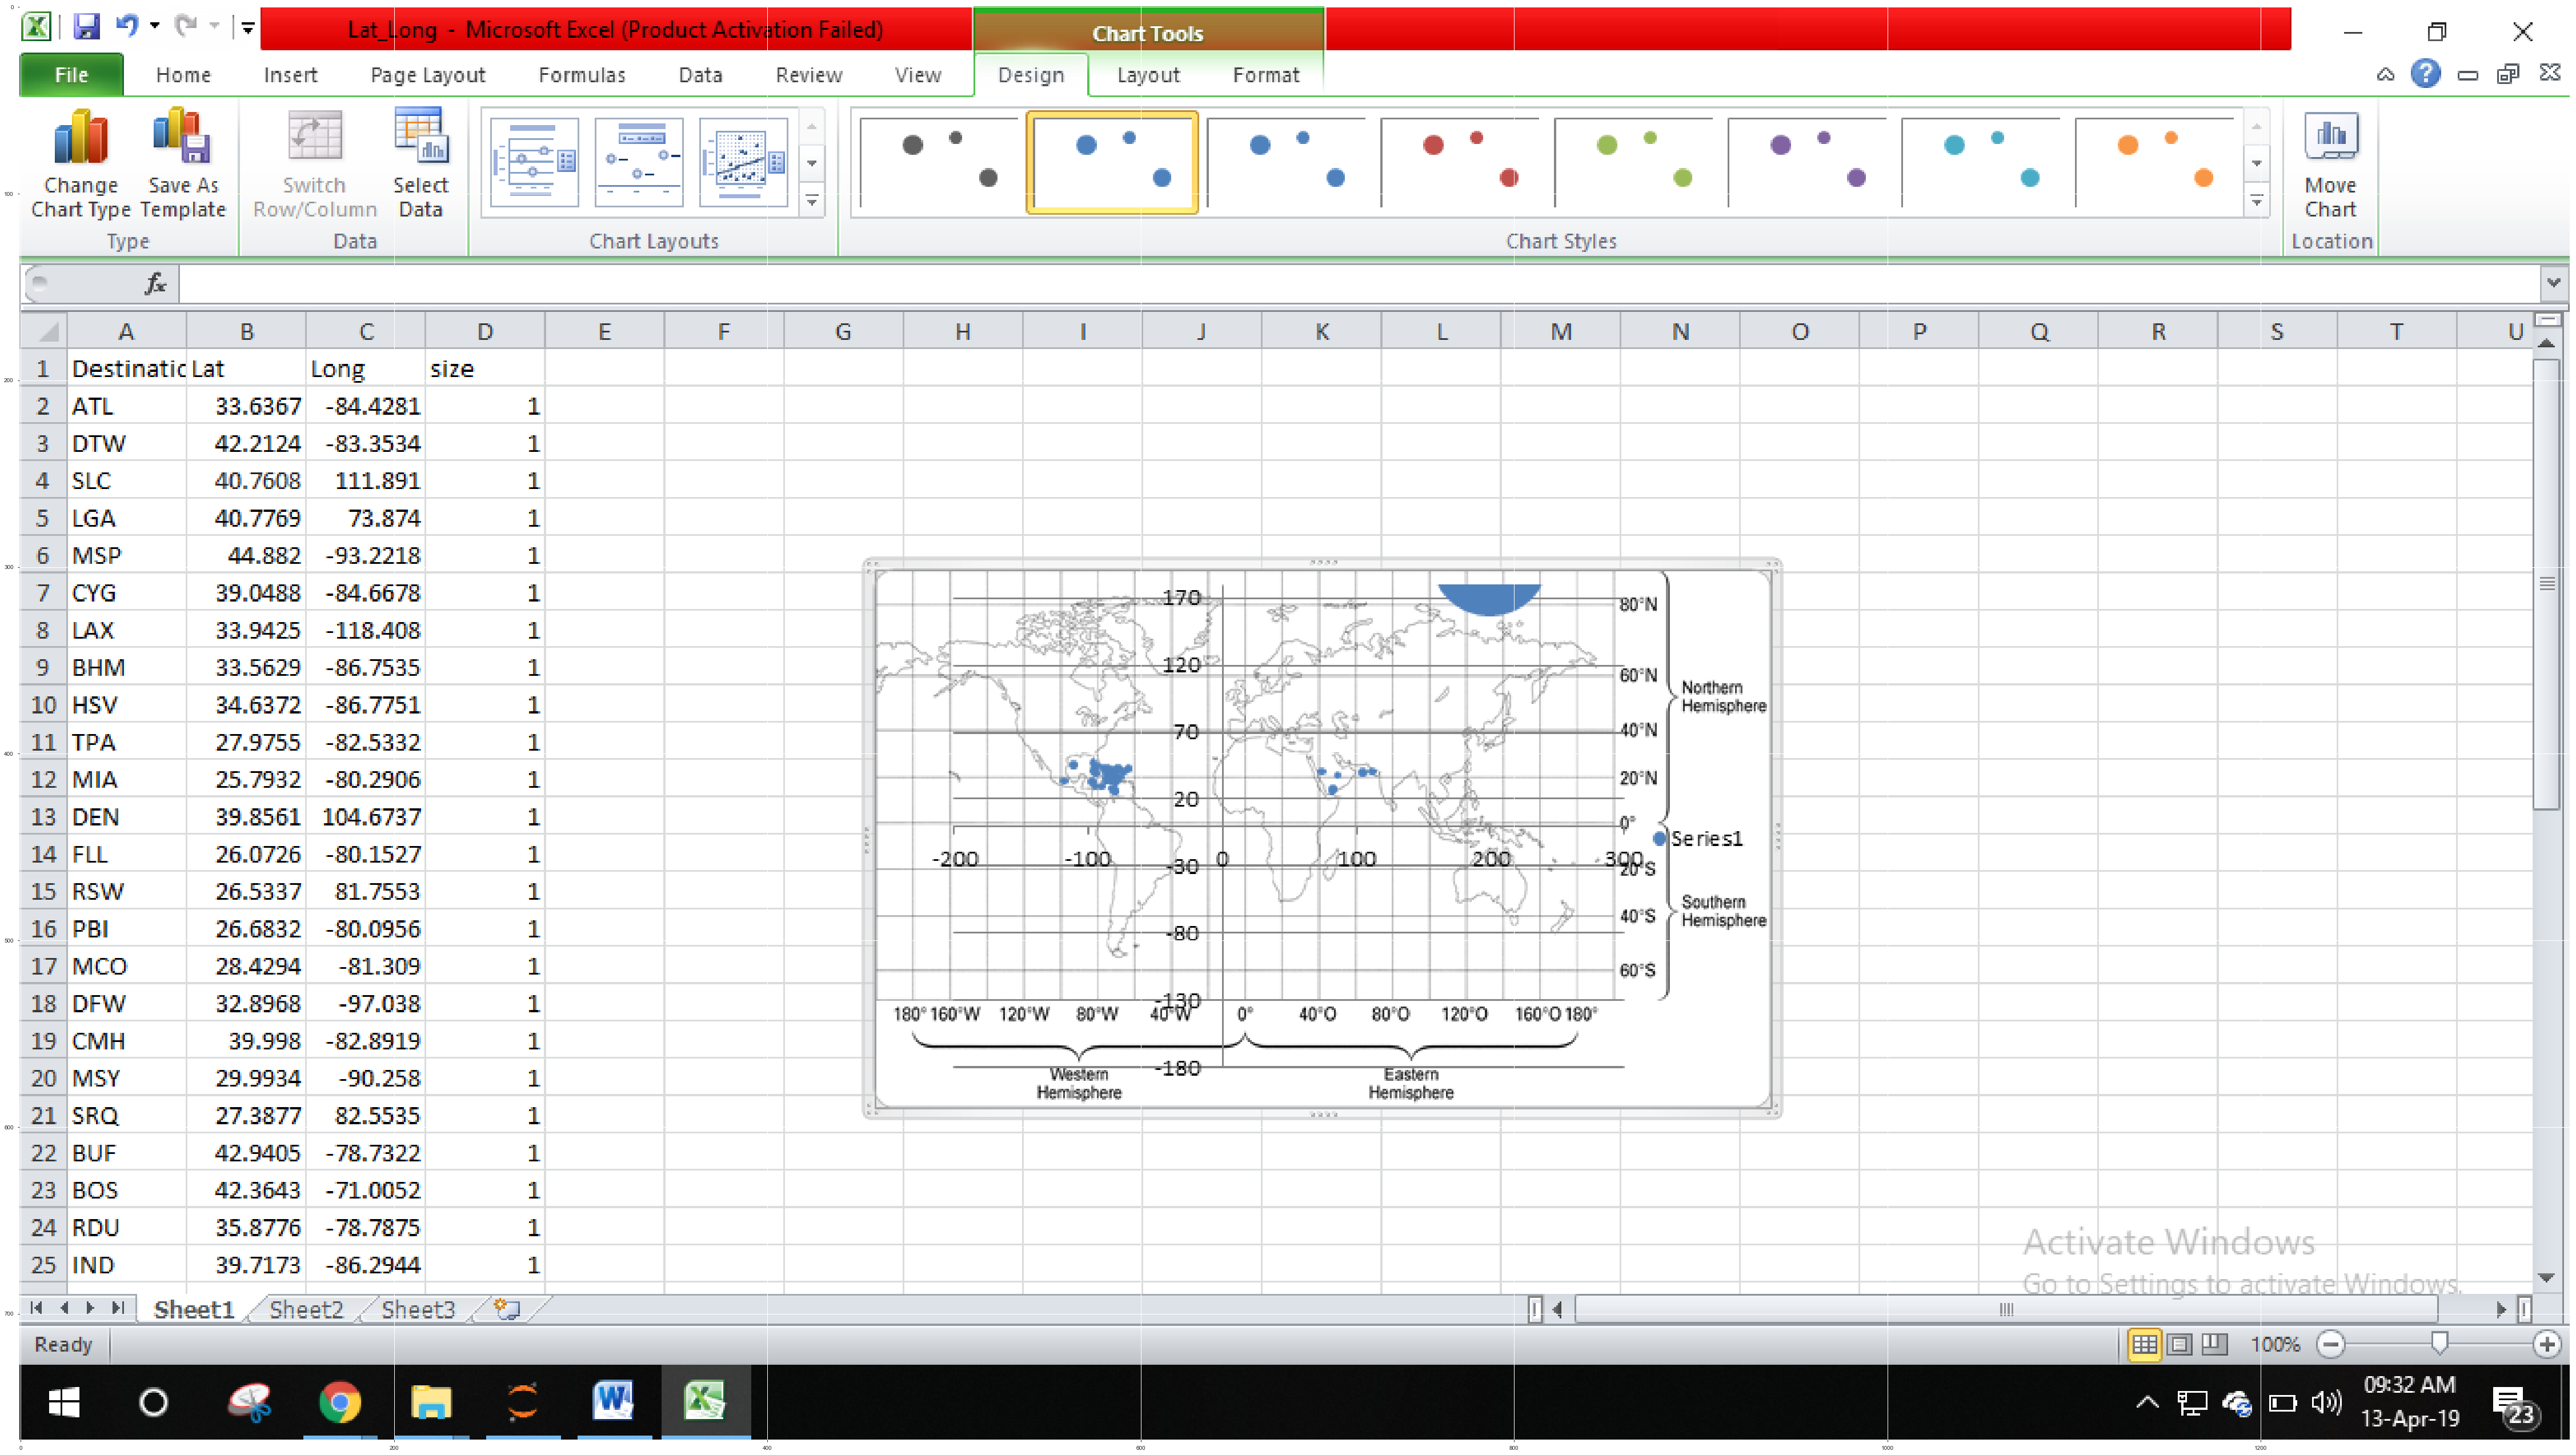

In [117]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (80, 80))
calender_2004 = mpimg.imread('map1.png')
plt.imshow(calender_2004)

### Holidays list of USA during 2016, are present in the dataset,which might have the impact on the delay of the flight on the specific days.

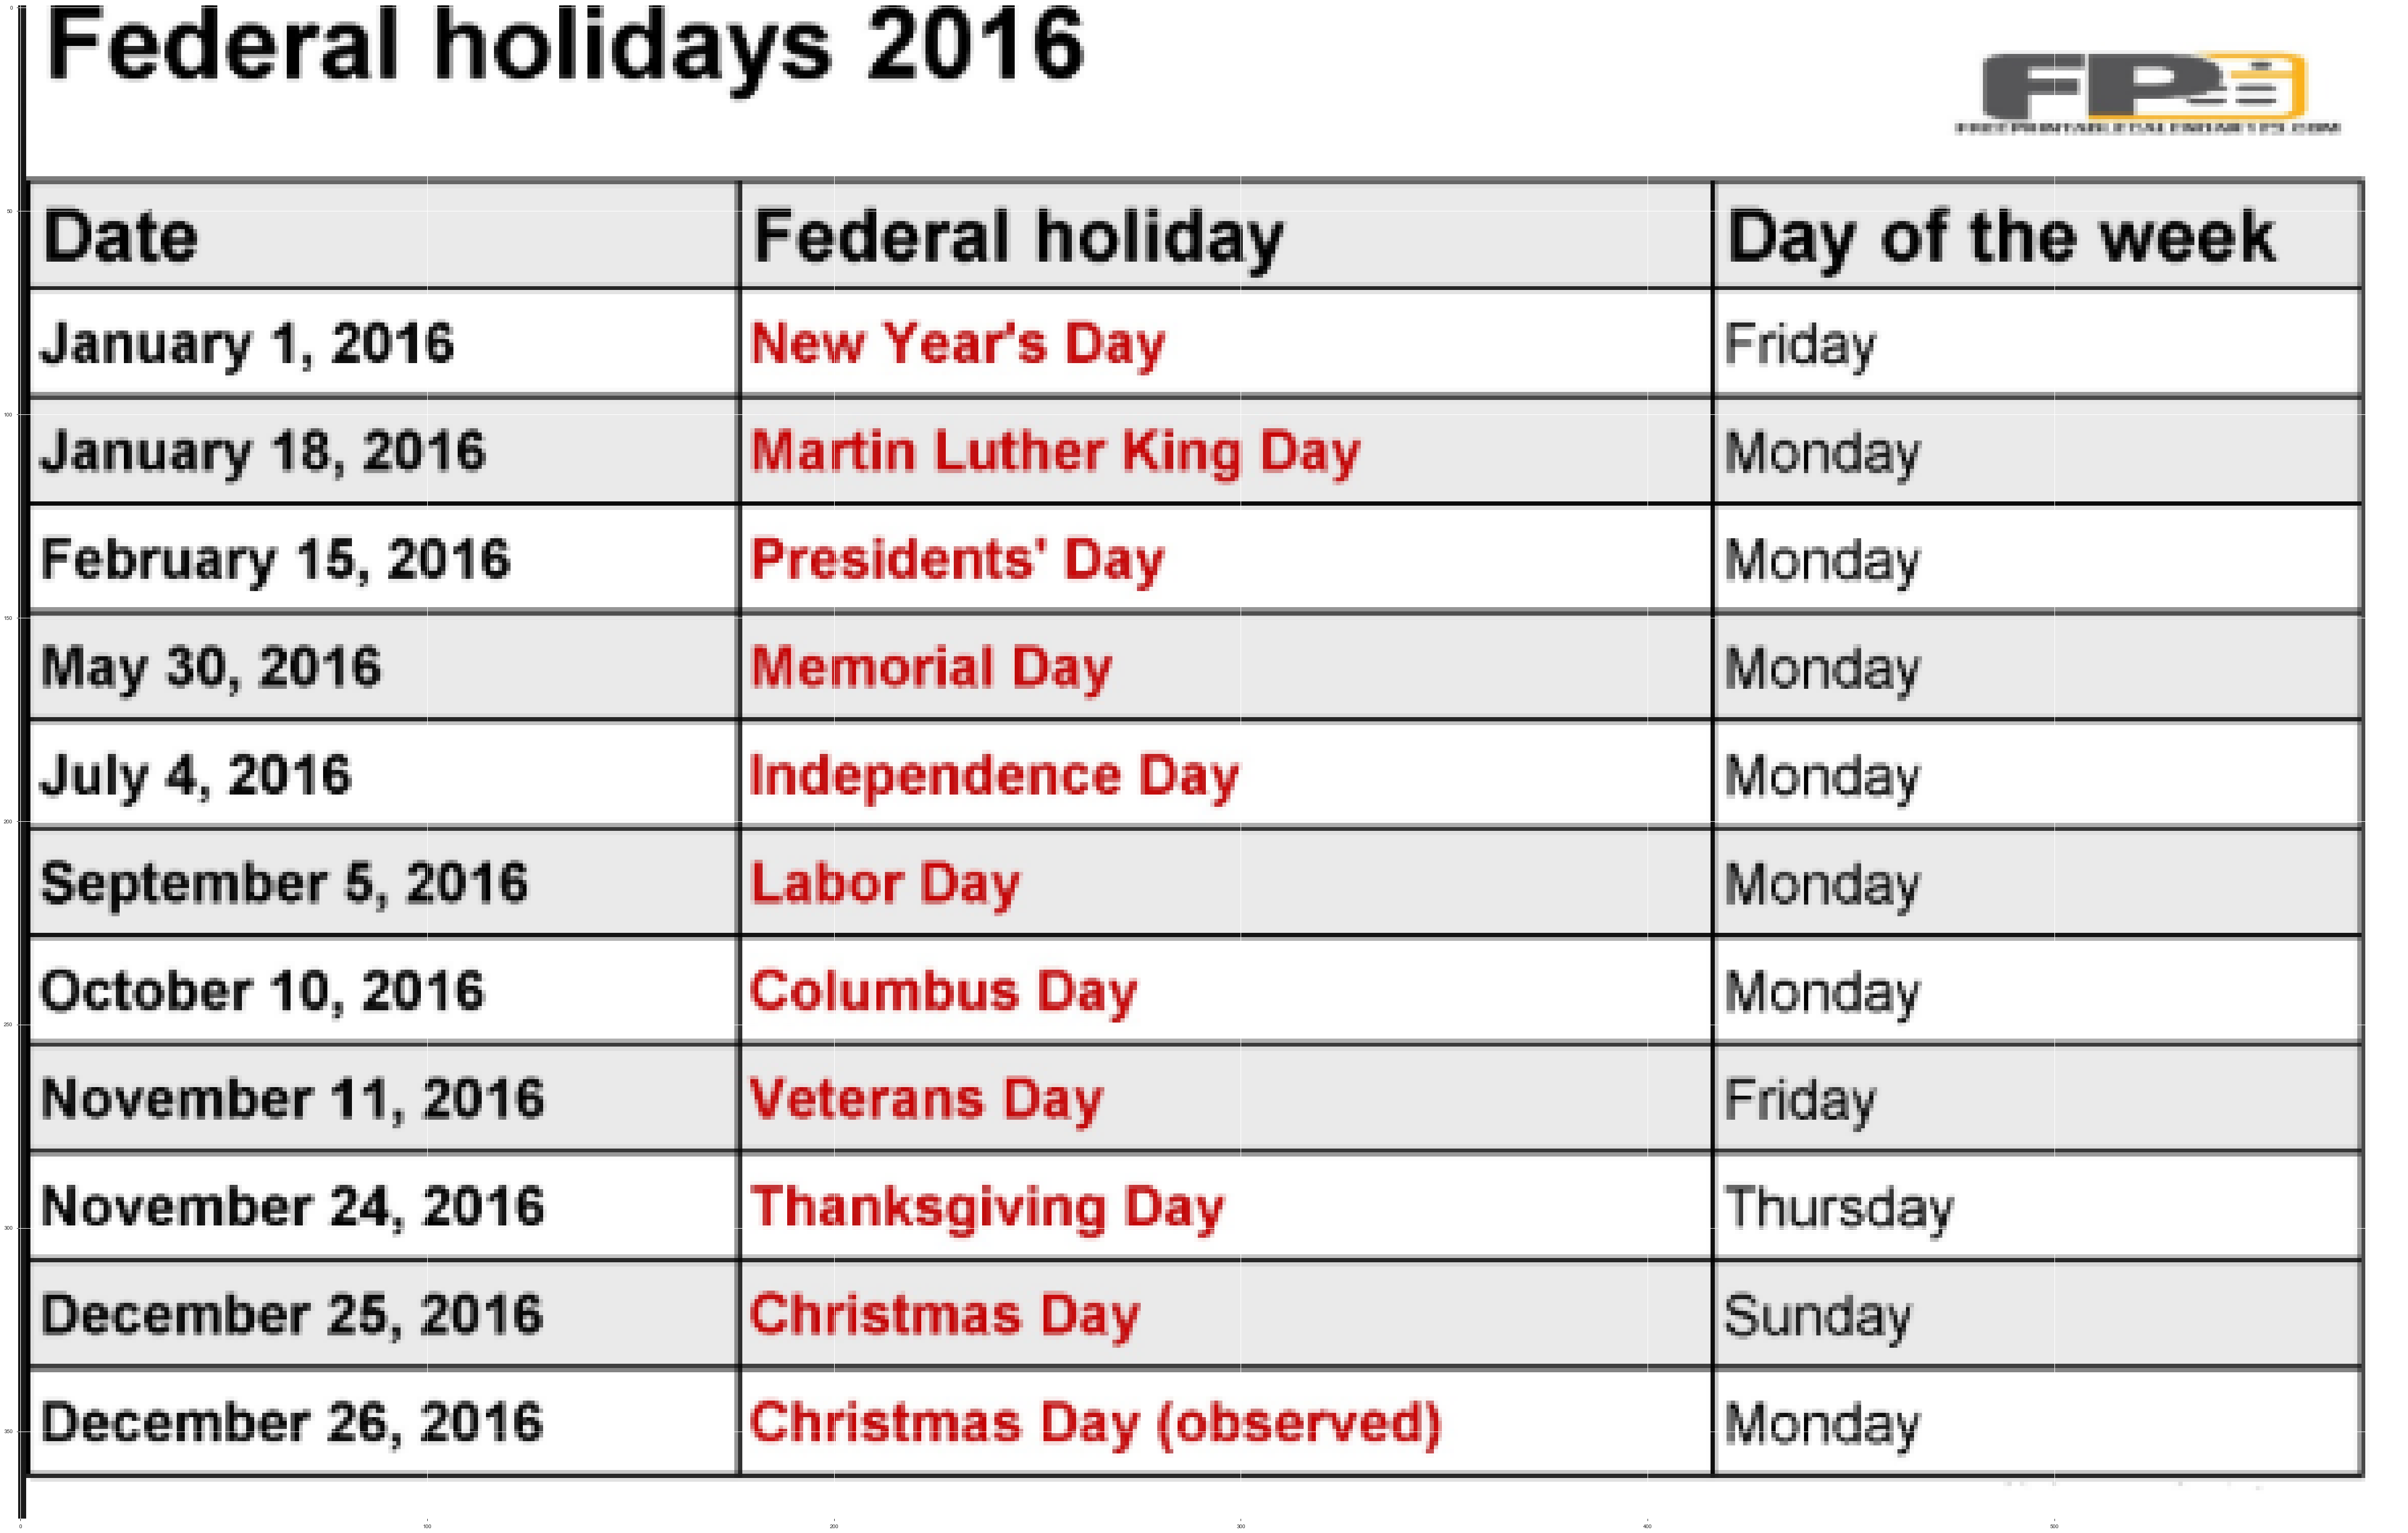

In [118]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (80, 80))
calender_2004 = mpimg.imread('Capture.png')
plt.imshow(calender_2004)

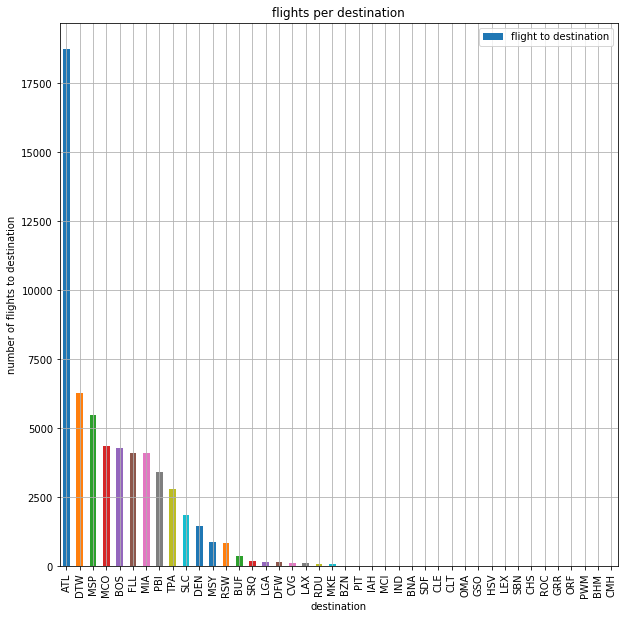

In [153]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

maxflight_to_destination = Train_data1.groupby('Destination_Airport').size().sort_values(ascending=False,)
maxflight_to_destination.plot(kind='bar',label='flight to destination',title='flights per destination',
                              grid=True,figsize=(10,10),use_index=True,legend='True',
                              rot='vertical',mark_right=True,table=False)
plt.xlabel('destination')
plt.ylabel('number of flights to destination')
plt.show()

In [127]:
Train_dumb = Train_data1.copy()

In [128]:
Train_dumb.head(2)

,Date_(MM/DD/YYYY),Flight_Number,Destination_Airport,Scheduled_departure_time,Actual_departure_time,Scheduled_elapsed_time_(Minutes),Actual_elapsed_time_(Minutes),Departure_delay_(Minutes),Wheels-off_time,Taxi-Out_time_(Minutes),Delay_Carrier_(Minutes),Delay_Weather_(Minutes),Delay_National_Aviation_System_(Minutes),Delay_Security_(Minutes),Delay_Late_Aircraft_Arrival_(Minutes),Elapse_delay,Delay,Quarter,Dayofweek,Time
0,2016-01-01,189,DTW,905,09:19,129,120,14,09:44,25,0,0,0,0,0,-9,0,1,4,evening
1,2016-01-01,344,ATL,1200,11:55,172,141,-5,12:06,11,0,0,0,0,0,-31,0,1,4,evening


### Frequency of flights with respect to days 

[Text(0,0.5,'flights Count'),
 Text(0.5,0,'day of the week'),
 Text(0.5,1,'Average flights on days'),
 None]

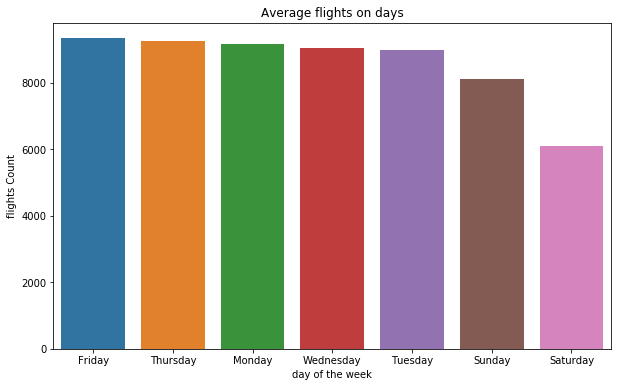

In [50]:
import calendar
fig,(ax2)= plt.subplots(nrows=1)

fig.set_size_inches(10,6)

Train_dumb['weekday'] = Train_dumb['Date_(MM/DD/YYYY)'].dt.weekday_name
weekday_frequency = Train_dumb.weekday.value_counts().reset_index()
weekday_frequency.columns = ['weekday','frequency']
sns.barplot(x='weekday',y='frequency',data=weekday_frequency,ax=ax2)
ax2.set(xlabel='day of the week', ylabel='flights Count',title="Average flights on days",label='big')

In [58]:
Train_dumb.dtypes

Date_(MM/DD/YYYY)                           datetime64[ns]
Flight_Number                                      float64
Destination_Airport                               category
Scheduled_departure_time                             int32
Actual_departure_time                               object
Scheduled_elapsed_time_(Minutes)                   float64
Actual_elapsed_time_(Minutes)                      float64
Departure_delay_(Minutes)                          float64
Wheels-off_time                                     object
Taxi-Out_time_(Minutes)                            float64
Delay_Carrier_(Minutes)                            float64
Delay_Weather_(Minutes)                            float64
Delay_National_Aviation_System_(Minutes)           float64
Delay_Security_(Minutes)                           float64
Delay_Late_Aircraft_Arrival_(Minutes)              float64
Elapse_delay                                       float64
Delay                                                int

In [59]:
Train_dumb["Scheduled_departure_time"] =Train_dumb["Scheduled_departure_time"].astype('str')
#Train_dumb["Hour_dept"] =Train_dumb["Scheduled_departure_time"].str[:2]

In [64]:
Train_dumb["Hour_dept"] =Train_data["Scheduled_departure_time"].str[:2]

In [67]:
Train_dumb["Hour_dept"].head(5)

0    09
1    12
2    12
3    17
4    16
Name: Hour_dept, dtype: object

### Frequency of the Flights with respect hourly 

[Text(0,0.5,'flights Count'),
 Text(0.5,0,'hour of the day'),
 Text(0.5,1,'Average flights in each hour'),
 None]

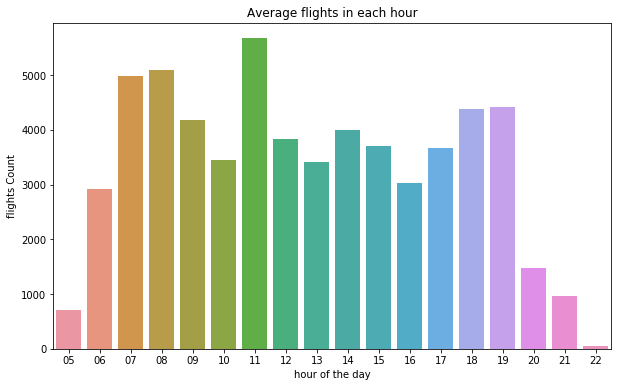

In [68]:


fig,(ax3)= plt.subplots(nrows=1)

fig.set_size_inches(10,6)

hour_frequency = Train_dumb.Hour_dept.value_counts().reset_index()
hour_frequency.columns = ['hour','frequency']
sns.barplot(x='hour',y='frequency',data=hour_frequency,ax=ax3)
ax3.set(xlabel='hour of the day', ylabel='flights Count',title="Average flights in each hour",label='big')

### Most of the delays we could see on Fridays.

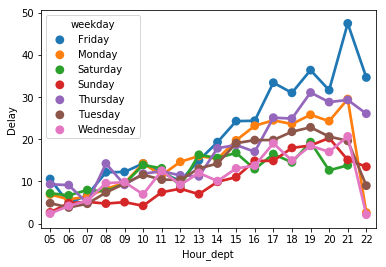

In [69]:

hourAggregated = pd.DataFrame(Train_dumb.groupby(["Hour_dept","weekday"])["Delay"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour_dept"], y=hourAggregated["Delay"],hue=hourAggregated["weekday"], data=hourAggregated)

In [70]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

In [72]:
Train_dumb.dtypes

Date_(MM/DD/YYYY)                           datetime64[ns]
Flight_Number                                      float64
Destination_Airport                               category
Scheduled_departure_time                            object
Actual_departure_time                               object
Scheduled_elapsed_time_(Minutes)                   float64
Actual_elapsed_time_(Minutes)                      float64
Departure_delay_(Minutes)                          float64
Wheels-off_time                                     object
Taxi-Out_time_(Minutes)                            float64
Delay_Carrier_(Minutes)                            float64
Delay_Weather_(Minutes)                            float64
Delay_National_Aviation_System_(Minutes)           float64
Delay_Security_(Minutes)                           float64
Delay_Late_Aircraft_Arrival_(Minutes)              float64
Elapse_delay                                       float64
Delay                                                int

### Outlier Detection for each feature

In [73]:
num_values1=Train_dumb.select_dtypes(['float64','int64','int32']).columns

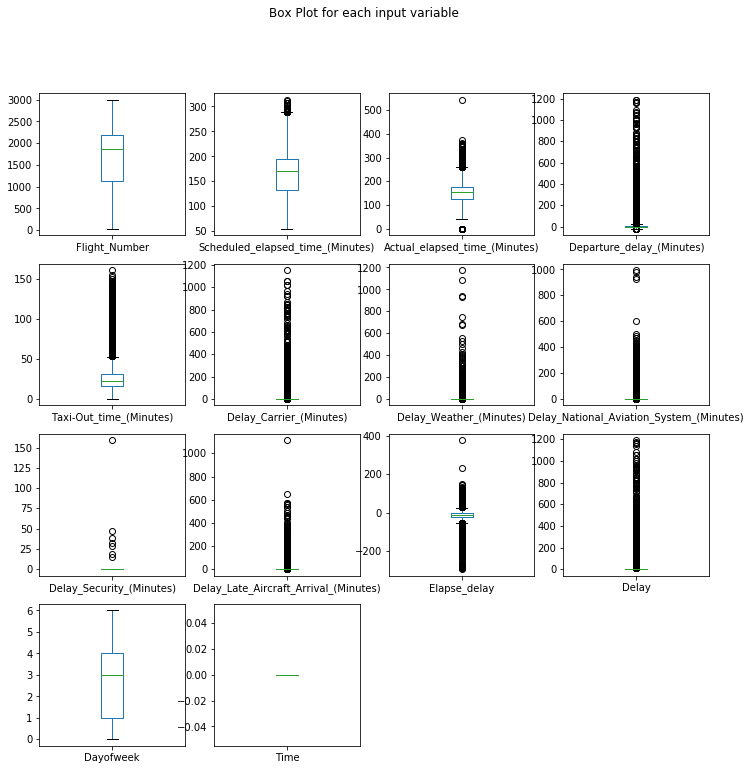

In [75]:
Train_dumb[num_values1].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12),title='Box Plot for each input variable')
plt.show()

In [129]:
Train_dumb["month"] = Train_dumb["Date_(MM/DD/YYYY)"].dt.month

### Frequency of the flights with respect to month.

[Text(0,0.5,'flights Count'),
 Text(0.5,0,'month'),
 Text(0.5,1,'Average flights on months'),
 None]

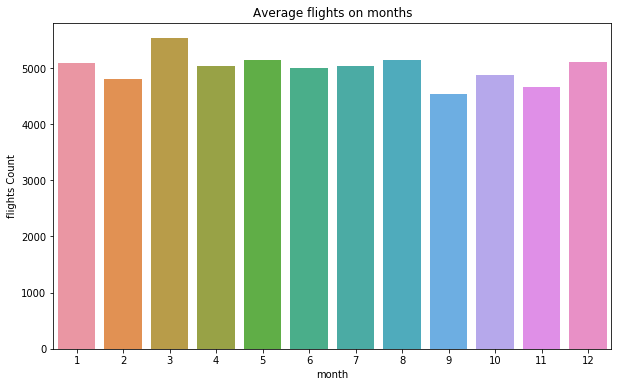

In [165]:
import calendar
fig,(ax2)= plt.subplots(nrows=1)

fig.set_size_inches(10,6)

Train_dumb['month'] = Train_dumb['Date_(MM/DD/YYYY)'].dt.month
weekday_frequency = Train_dumb.month.value_counts().reset_index()
weekday_frequency.columns = ['month','frequency']
sns.barplot(x='month',y='frequency',data=weekday_frequency,ax=ax2)
ax2.set(xlabel='month', ylabel='flights Count',title="Average flights on months",label='big')

### Histogram for each numeric input variable

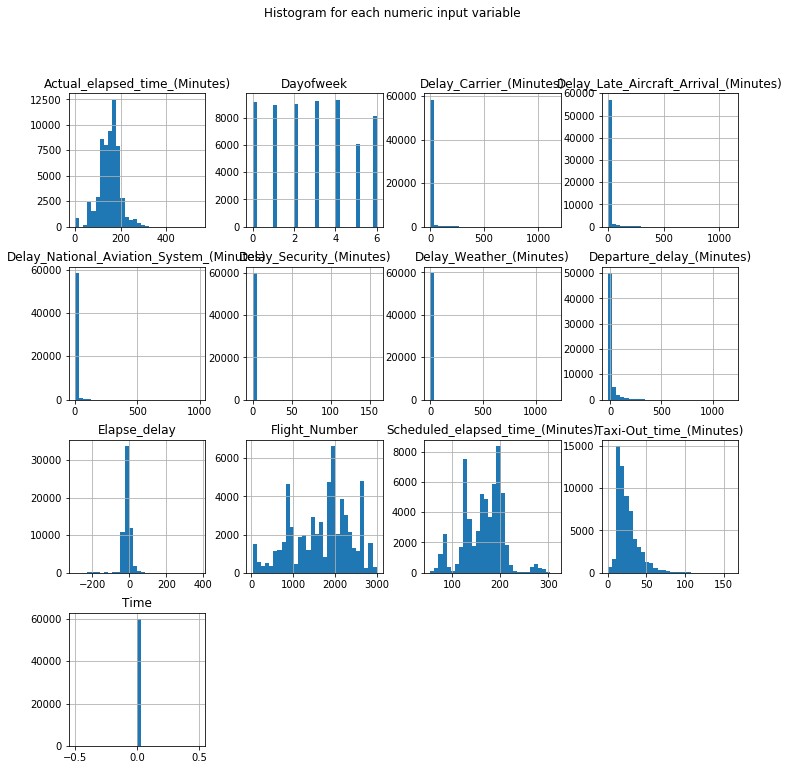

In [79]:
import pylab as pl
Train_dumb[num_values1].drop('Delay' ,axis=1).hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

### Delay with respect to Morning and Night .

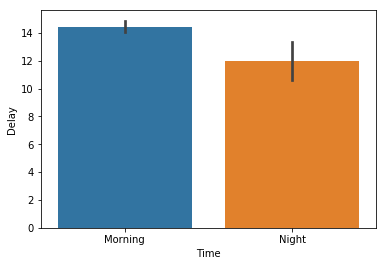

In [167]:
#checking delay as per distance
sns.barplot(x='Time',y='Delay',data=Train_data1)

In [133]:
Train_data1['Time'].value_counts()

evening    59986
Name: Time, dtype: int64

In [140]:
Train_dumb['weather_cool']=Train_dumb['Delay_Weather_(Minutes)']

#### Delay due to Weather Condition 

<function matplotlib.pyplot.show(*args, **kw)>

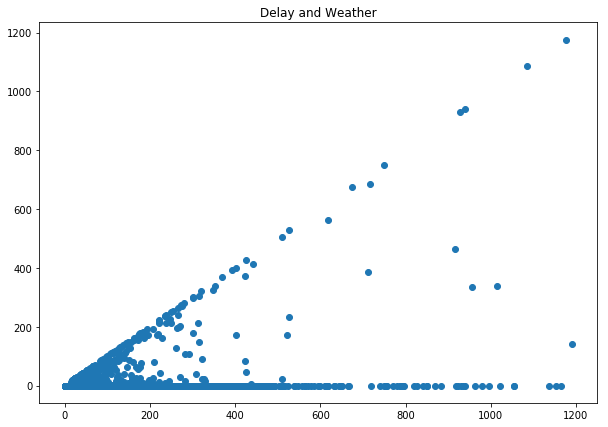

In [143]:
plt.figure(figsize = (10,7))

plt.scatter(x = Train_dumb.Delay,y = Train_dumb.weather_cool)                                     
plt.title('Delay and Weather')
plt.show

### Model Building

In [99]:
feature_names = ['Scheduled_elapsed_time_(Minutes)',
       'Taxi-Out_time_(Minutes)', 
         'Quarter', 'Dayofweek','Time']

X = Train_data1[feature_names]
Y = Train_data1['Delay']
Y_cls = Train_data1.apply( lambda x: 'Delayed' if x.Delay > 0  else 'Not Delayed', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=0)

X_train_cls, X_val_cls, Y_train_cls, Y_val_cls = train_test_split(X, Y_cls, random_state=0)


X_test = Test_data1[feature_names]
Y_test = Test_data1['Delay']
Y_test_cls = Test_data1.apply( lambda x: 'Delayed' if x.Delay > 0  else 'Not Delayed', axis=1)

from sklearn.preprocessing import LabelEncoder
time_mor_night = LabelEncoder()
Train_data1['Time'] = time_mor_night.fit_transform(Train_data1.Time)

Test_data1['Time'] = time_mor_night.fit_transform(Test_data1.Time)

In [390]:
#feature_names = ['Scheduled_elapsed_time_(Minutes)',
#       'Taxi-Out_time_(Minutes)', 
#         'Quarter', 'Dayofweek', 'Delay_Carrier_(Minutes)',
#       'Delay_Weather_(Minutes)', 'Delay_National_Aviation_System_(Minutes)',
#       'Delay_Late_Aircraft_Arrival_(Minutes)']
#feature_names1 = ['Scheduled_elapsed_time_(Minutes)',
 #      'Taxi-Out_time_(Minutes)', 
  #       'Quarter', 'Dayofweek', 'Time','Delay']



### RandomForestRegressor

In [43]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 250 decision trees
rf = RandomForestRegressor(n_estimators = 250,max_features=5, random_state = 42)
# Train the model on training data
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [399]:
# Use the forest's predict method on the test data
predictions1 = rf.predict(X_val)
errors = abs(predictions1 - Y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 23.11 degrees.


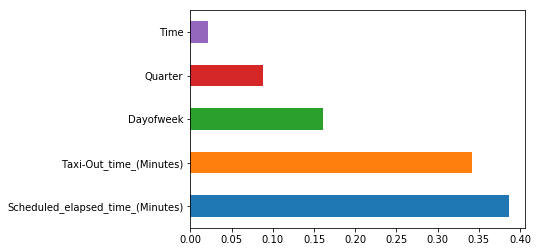

In [44]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(20).plot(kind='barh')

In [45]:

predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 22.39 degrees.


In [46]:
predictions

array([ 0.        ,  8.304     ,  7.234     , ..., 11.31129048,
        2.05029524,  2.05029524])

In [35]:
import xgboost

In [36]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)




In [79]:

xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [78]:
# Use the forest's predict method on the test data
predictions = xgb.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions - Y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 21.07 degrees.


In [80]:
# Use the forest's predict method on the test data
predictions = xgb.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.49 degrees.


In [409]:
X_train.dtypes

Scheduled_elapsed_time_(Minutes)    float64
Taxi-Out_time_(Minutes)             float64
Quarter                               int64
Dayofweek                             int64
Time                                  int32
dtype: object

In [109]:
#Applied label encoding to SKY conditions as we could see 3000 levels .
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
#le_sky_test = LabelEncoder()
X_train['Quarter'] = LE.fit_transform(X_train.Quarter)
X_val['Quarter'] = LE.fit_transform(X_val.Quarter)

X_test['Quarter'] = LE.fit_transform(X_test.Quarter)

X_train['Time'] = LE.fit_transform(X_train.Time)
X_val['Time'] = LE.fit_transform(X_val.Time)

X_test['Time'] = LE.fit_transform(X_test.Time)
                                  
                                  
                                  



#Final_train_A['make_encoded'] = le_sky_test.fit_transform(df.make)

In [111]:
#### Classification
X_train_cls['Quarter'] = LE.fit_transform(X_train_cls.Quarter)
X_val_cls['Quarter'] = LE.fit_transform(X_val_cls.Quarter)



X_train_cls['Time'] = LE.fit_transform(X_train_cls.Time)
X_val_cls['Time'] = LE.fit_transform(X_val_cls.Time)



In [415]:
X_train['Quarter'].dtype

dtype('int64')

### Grid search Parameter tuning

In [ ]:
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.03,0.05,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cv_results = RandomizedSearchCV(xgb, params,cv = skf.split(X_train,Y_train))

In [62]:
cv_results.fit(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000000000E3D4F68>,
          error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.03, 0.05, 0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [69]:
print('\n All results:')
print('\n Best estimator:')
print(random_search.estimator)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print('\n Best hyperparameters:')
print(random_search.get_params)
results = pd.DataFrame(random_search.cv)



 All results:
<generator object _BaseKFold.split at 0x000000000E476F68>

 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

 Best normalized gini score for 3-fold search with 5 parameter combinations:

 Best hyperparameters:
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000000000E476F68>,
          error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthr

### Best parameters after tuning (Grid search)

In [71]:
xgb1 = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [72]:

xgb1.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [75]:
# Use the forest's predict method on the test data
predictions = xgb1.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions - Y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 21.07 degrees.


In [76]:
# Use the forest's predict method on the test data
predictions = xgb1.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.49 degrees.


### Lasso regression

In [41]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

predictions = lasso.predict(X_val)
# Calculate the absolute errors
errors = abs(predictions - Y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 21.33 degrees.


In [42]:
predictions = lasso.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.03 degrees.


### Support Vector Regression

In [170]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf_val = svr_rbf.fit(X_train, Y_train).predict(X_val)
y_rbf_test = svr_rbf.fit(X_train, Y_train).predict(X_test)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)

#### Classification

In [96]:
Y_train_cls = Train_data1.apply( lambda x: 'Delayed' if x.Delay > 0  else 'Not Delayed', axis=1)
Y_test_cls = Test_data1.apply( lambda x: 'Delayed' if x.Delay > 0  else 'Not Delayed', axis=1)

In [124]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
rndforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rndforest.fit(X_train_cls, Y_train_cls)


print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rndforest.score(X_train_cls, Y_train_cls)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rndforest.score(X_val_cls, Y_val_cls)))


pred = model.predict(X_val)
print(confusion_matrix(Y_val_cls, pred))
print(classification_report(Y_val_cls, pred))

print(confusion_matrix(y_pred_xgboost, Y_test_cls))

Accuracy of Random Forest classifier on training set: 0.83
Accuracy of Random Forest classifier on test set: 0.83
[[  645  2346]
 [  198 11808]]
              precision    recall  f1-score   support

     Delayed       0.77      0.22      0.34      2991
 Not Delayed       0.83      0.98      0.90     12006

   micro avg       0.83      0.83      0.83     14997
   macro avg       0.80      0.60      0.62     14997
weighted avg       0.82      0.83      0.79     14997

[[ 1221   533]
 [ 4726 24304]]


### XGBOOST Classification

In [123]:
### XGBoost

import xgboost as xgb
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train_cls, Y_train_cls)

y_pred_xgboost = model.predict(X_test)
print('Accuracy of XGboost classifier on training set: {:.2f}'
     .format(model.score(X_train_cls, Y_train_cls)))
print('Accuracy of XGboost classifier on test set: {:.2f}'
     .format(model.score(X_val, Y_val_cls)))

pred = model.predict(X_val)
print(confusion_matrix(Y_val_cls, pred))
print(classification_report(Y_val_cls, pred))

print(confusion_matrix(y_pred_xgboost, Y_test_cls))

Accuracy of XGboost classifier on training set: 0.83
Accuracy of XGboost classifier on test set: 0.83
[[  645  2346]
 [  198 11808]]
              precision    recall  f1-score   support

     Delayed       0.77      0.22      0.34      2991
 Not Delayed       0.83      0.98      0.90     12006

   micro avg       0.83      0.83      0.83     14997
   macro avg       0.80      0.60      0.62     14997
weighted avg       0.82      0.83      0.79     14997

[[ 1221   533]
 [ 4726 24304]]



### Summary

Note:: The delays which are less then 10 minutes or in negatives are taken as 0 (Considering they are not delayed) .

For the given dataset , we have analyzed and compared multiple machine learning classification and Regression algorithm .
Comparing all the accuracies , we observed that  XGBoost with Parameter tuning gave reasonably fair result in the unseen data in terms of RMSE and incase of classification XGBoost and Random forest gave fair results. 


